# Introduction
This analysis explores the relationship between the lyrical content of songs and their sentiment scores, streaming numbers, and other musical features. The primary objective is to understand common themes and word usage in song lyrics and to investigate how these elements correlate with the song's sentiment and popularity. The study aims to provide insights into the textual content of songs and its impact on listeners' reception.

# Data Overview

The initial dataset, sourced from Spotify, included information about various music tracks, such as artist names, song titles, release dates, streaming counts, and musical attributes. To enrich this dataset for a more comprehensive text analysis, a data engineering process was undertaken to scrape lyrics for each song. The merging of the Spotify data with the newly scraped lyrics created a robust dataset for in-depth sentiment and textual analysis.

# Methodology

The methodology encompassed several key steps:

Data Engineering: Song lyrics were scraped from a lyrics website for each track in the Spotify dataset, using BeautifulSoup for HTML parsing and handling delays to manage request limits and server load.

Data Cleaning and Preprocessing: The collected data underwent cleaning and preprocessing, including handling missing lyrics and standardizing formats.

Text Analysis: Techniques like TF-IDF (Term Frequency-Inverse Document Frequency) were employed to identify common words and themes in the lyrics.

Sentiment Analysis: Sentiment scores were computed for the lyrics to gauge the emotional tone of each song.

Correlation Analysis: The study investigated the relationships between sentiment scores, streaming numbers, and other musical features.

In [118]:
#Libraries for data processing, visualization, and clustering are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)

import warnings

warnings.filterwarnings("ignore")

In [119]:
#The Spotify 2023 dataset is loaded.
df = pd.read_csv('./spotify2023.csv', encoding = 'latin-1')

In [120]:
df.head(30)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33


In [4]:
df.shape

(953, 24)

In [5]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from time import sleep
import csv
import json
import re

# url to scrape the lyrics from
base_url = "https://www.azlyrics.com/lyrics/{}/{}.html"

processed_songs = []
processed_names = []

# preprocessing the songs name for scraping
for song in df.track_name:
    
    if "(" not in song:
        processed_song = re.sub(r'\W+', '', song).lower()
        processed_songs.append(processed_song)
        
    else:
  
        processed_song = re.sub(r'\(.*$', '', song).lower()
        processed_song = re.sub(r'\W+', '', processed_song).lower()
        processed_songs.append(processed_song)
 
    
    
for name in df['artist(s)_name']:
    
    if ', ' not in name:
        processed_name = re.sub(r'\W+', '', name).lower()
        processed_names.append(processed_name)
        
    else:
        processed_name = re.sub(r',.*$', '', name).lower()
        processed_name = re.sub(r'\W+', '', processed_name).lower()
        processed_names.append(processed_name)


processed_songs




['seven',
 'lala',
 'vampire',
 'cruelsummer',
 'whereshegoes',
 'sprinter',
 'ellabailasola',
 'columbia',
 'fukumean',
 'labeberemix',
 'unx100to',
 'supershy',
 'flowers',
 'daylight',
 'asitwas',
 'killbill',
 'cupidtwinver',
 'whatwasimadeforfromthemotionpicturebarbie',
 'classy101',
 'likecrazy',
 'ladygaga',
 'icanseeyou',
 'iwannabeyours',
 'pesoplumabzrpmusicsessionsvol55',
 'popular',
 'saborfresa',
 'calmdown',
 'mojabighost',
 'lastnight',
 'dancethenight',
 'rush',
 'tulum',
 'creepin',
 'antihero',
 'tqg',
 'losdelespacio',
 'frï½ï½gil',
 'blankspace',
 'style',
 'tqm',
 'elazul',
 'sunflowerspidermanintothespiderverse',
 'imgood',
 'seeyouagain',
 'barbieworld',
 'angelslikeyou',
 'iaintworried',
 'dieforyou',
 'starboy',
 'dieforyouremix',
 'elcielo',
 'babydonthurtme',
 'amargura',
 '',
 'anotherlove',
 'blindinglights',
 'moonlight',
 'labachata',
 's91',
 'cardigan',
 'tï½ï',
 'boysaliarpt2',
 'leftandright',
 'beso',
 'heymor',
 'yellow',
 'karma',
 'people',
 'over

In [6]:
lyrics_not_found_for = []

# delay after each execution of call for not exceeding the requests count and also not to overburden the server
delay = 10

song_names = []
lyrics = []

for artist, song in zip(processed_names, processed_songs):
        
        final_url = base_url.format(artist, song)
        print(final_url)

        try:
            html_page = urlopen(final_url)
            soup = BeautifulSoup(html_page, 'html.parser')

            html_pointer = soup.find('div', attrs={'class':'ringtone'})
            song_name = html_pointer.find_next('b').contents[0].strip()
            song_lyrics = html_pointer.find_next('div').text.strip()
            
            song_names.append(song_name)
            lyrics.append(song_lyrics)
   
            
            print("Lyrics successfully written to file for : " + song_name)
            
        except:
            print("Lyrics not found for : " + song)
            lyrics_not_found_for.append(song)
            
        finally:
            sleep(delay) 
            


https://www.azlyrics.com/lyrics/latto/seven.html
Lyrics not found for : seven
https://www.azlyrics.com/lyrics/myketowers/lala.html
Lyrics successfully written to file for : "LALA"
https://www.azlyrics.com/lyrics/oliviarodrigo/vampire.html
Lyrics successfully written to file for : "vampire"
https://www.azlyrics.com/lyrics/taylorswift/cruelsummer.html
Lyrics successfully written to file for : "Cruel Summer"
https://www.azlyrics.com/lyrics/badbunny/whereshegoes.html
Lyrics successfully written to file for : "WHERE SHE GOES"
https://www.azlyrics.com/lyrics/dave/sprinter.html
Lyrics successfully written to file for : "Sprinter"
https://www.azlyrics.com/lyrics/eslabonarmado/ellabailasola.html
Lyrics successfully written to file for : "Ella Baila Sola"
https://www.azlyrics.com/lyrics/quevedo/columbia.html
Lyrics successfully written to file for : "Columbia"
https://www.azlyrics.com/lyrics/gunna/fukumean.html
Lyrics successfully written to file for : "fukumean"
https://www.azlyrics.com/lyrics/

In [7]:
print("Total count : ", len(song_names + lyrics_not_found_for ),"songs")
print("Lyrics successfully scraped for : ", len(song_names), "songs")
print("Lyrics not found for :", len(lyrics_not_found_for),"songs\n")
print("\nHere's the list :\n")
print(lyrics_not_found_for)

Total count :  953 songs
Lyrics successfully scraped for :  558 songs
Lyrics not found for : 395 songs


Here's the list :

['seven', 'labeberemix', 'unx100to', 'cupidtwinver', 'whatwasimadeforfromthemotionpicturebarbie', 'ladygaga', 'icanseeyou', 'pesoplumabzrpmusicsessionsvol55', 'popular', 'calmdown', 'creepin', 'losdelespacio', 'frï½ï½gil', 'sunflowerspidermanintothespiderverse', 'imgood', 'seeyouagain', 'dieforyou', 'starboy', 'dieforyouremix', '', 'blindinglights', 'tï½ï', 'beso', 'yellow', 'sweaterweather', 'quevedobzrpmusicsessionsvol52', 'corazï½ï½nva', 'untilifoundyou', 'novidadenaï½ï', 'stay', 'meportobonito', 'montagemfrpunk', 'whatitis', 'cocochanel', 'donï½ï½ï½tbl', 'allmylife', 'taketwo', 'toomanynights', 'coldheartpnauremix', 'taksegampangitu', 'lagunas', 'raravez', 'luna', 'felizcumpleaï½ï½osfe', 'cantholdus', 'lovelybonustrack', 'rauwalejandrobzrpmusicsessionsvol56', 'shakirabzrpmusicsessionsvol53', 'calling', 'trance', 'terevaaste', 'believer', 'novobalanï½', 'golbol

In [8]:
print(song_names)
        
df.track_name.head(40)

['"LALA"', '"vampire"', '"Cruel Summer"', '"WHERE SHE GOES"', '"Sprinter"', '"Ella Baila Sola"', '"Columbia"', '"fukumean"', '"Super Shy"', '"Flowers"', '"Daylight"', '"As It Was"', '"Kill Bill"', '"Classy 101"', '"Like Crazy"', '"I Wanna Be Yours"', '"SABOR FRESA"', '"MOJABI GHOST"', '"Last Night"', '"Dance The Night"', '"Rush"', '"TULUM"', '"Anti-Hero"', '"TQG"', '"Blank Space"', '"Style"', '"TQM"', '"El Azul"', '"Barbie World"', '"Angels Like You"', '"I Ain\'t Worried"', '"El Cielo"', '"Baby Don\'t Hurt Me"', '"AMARGURA"', '"Another Love"', '"Moonlight"', '"La Bachata"', '"S91"', '"cardigan"', '"Boy\'s A Liar Pt.2"', '"Left And Right"', '"Hey Mor"', '"Karma"', '"People"', '"Overdrive"', '"Enchanted"', '"BABY HELLO"', '"Heat Waves"', '"golden hour"', '"Viva La Vida"', '"Here With Me"', '"Unholy"', '"Yandel 150"', '"Riptide"', '"Back To December"', '"El Merengue"', '"Someone You Loved"', '"Makeba"', '"Fast Car"', '"Still With You"', '"Say Yes To Heaven"', '"Snooze"', '"Summertime Sadn

0                   Seven (feat. Latto) (Explicit Ver.)
1                                                  LALA
2                                               vampire
3                                          Cruel Summer
4                                        WHERE SHE GOES
5                                              Sprinter
6                                       Ella Baila Sola
7                                              Columbia
8                                              fukumean
9                                       La Bebe - Remix
10                                            un x100to
11                                            Super Shy
12                                              Flowers
13                                             Daylight
14                                            As It Was
15                                            Kill Bill
16                                    Cupid - Twin Ver.
17    What Was I Made For? [From The Motion Pict

In [9]:

# Create a DataFrame from your scraped songs and lyrics
scraped_songs_df = pd.DataFrame({
    'track_name': song_names,
    'lyrics': lyrics
})

df, scraped_songs_df


(                              track_name      artist(s)_name  artist_count  \
 0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
 1                                   LALA         Myke Towers             1   
 2                                vampire      Olivia Rodrigo             1   
 3                           Cruel Summer        Taylor Swift             1   
 4                         WHERE SHE GOES           Bad Bunny             1   
 ..                                   ...                 ...           ...   
 948                         My Mind & Me        Selena Gomez             1   
 949            Bigger Than The Whole Sky        Taylor Swift             1   
 950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
 951                        En La De Ella  Feid, Sech, Jhayco             3   
 952                                Alone           Burna Boy             1   
 
      released_year  released_month  released_day 

In [10]:
scraped_songs_df['track_name'] = scraped_songs_df['track_name'].str.replace('"', '').str.strip()

In [11]:
df, scraped_songs_df

merged_df = df.merge(scraped_songs_df, left_on='track_name', right_on='track_name', how='left')


data = merged_df.copy()

merged_df


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,lyrics
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,NaN
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,"Todo está bien, no te tiene' que estresar\nA t..."
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,Hate to give the satisfaction asking how you'r...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,"(Yeah, yeah, yeah, yeah)\n\nFever dream high i..."
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,"Baby, dime la verdad\nSi te olvidaste de mí\nY..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,Wanna hear a part to my story?\nI tried to hid...
964,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,No words appear before me in the aftermath\nSa...
965,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6,NaN
966,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,Una noche que no puedo olvidar\nY aunque tenga...


In [12]:
import nltk
from nltk.corpus import stopwords

In [13]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\n', ' ', text)
    text = text.strip()  # Remove leading and trailing whitespace
    return text

sample = preprocess(data.lyrics[3])

In [14]:
words = nltk.word_tokenize(sample)
words

['yeah',
 'yeah',
 'yeah',
 'yeah',
 'fever',
 'dream',
 'high',
 'in',
 'the',
 'quiet',
 'of',
 'the',
 'night',
 'you',
 'know',
 'that',
 'i',
 'caught',
 'it',
 'oh',
 'yeah',
 'youre',
 'right',
 'i',
 'want',
 'it',
 'bad',
 'bad',
 'boy',
 'shiny',
 'toy',
 'with',
 'a',
 'price',
 'you',
 'know',
 'that',
 'i',
 'bought',
 'it',
 'oh',
 'yeah',
 'youre',
 'right',
 'i',
 'want',
 'it',
 'killing',
 'me',
 'slow',
 'out',
 'the',
 'window',
 'im',
 'always',
 'waiting',
 'for',
 'you',
 'to',
 'be',
 'waiting',
 'below',
 'devils',
 'roll',
 'the',
 'dice',
 'angels',
 'roll',
 'their',
 'eyes',
 'what',
 'doesnt',
 'kill',
 'me',
 'makes',
 'me',
 'want',
 'you',
 'more',
 'and',
 'its',
 'new',
 'the',
 'shape',
 'of',
 'your',
 'body',
 'its',
 'blue',
 'the',
 'feeling',
 'ive',
 'got',
 'and',
 'its',
 'ooh',
 'whoa',
 'oh',
 'its',
 'a',
 'cruel',
 'summer',
 'its',
 'cool',
 'thats',
 'what',
 'i',
 'tell',
 'em',
 'no',
 'rules',
 'in',
 'breakable',
 'heaven',
 'but',


In [15]:
stop_words = set(stopwords.words('english'))
stop_words_esp = set(stopwords.words('spanish'))

def del_stop_words(words):

    filtered_lyrics = [word for word in words if not word in stop_words]
    filtered_lyrics = [word for word in filtered_lyrics if not word in stop_words_esp]
    
    return filtered_lyrics


ready_lyrics = del_stop_words(words)

In [16]:
from collections import Counter

word_freq = Counter(ready_lyrics)

most_common = word_freq.most_common(10)
most_common

[('oh', 15),
 ('yeah', 12),
 ('summer', 8),
 ('im', 7),
 ('ooh', 6),
 ('whoa', 6),
 ('cruel', 6),
 ('want', 5),
 ('youre', 4),
 ('right', 4)]

In [19]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)


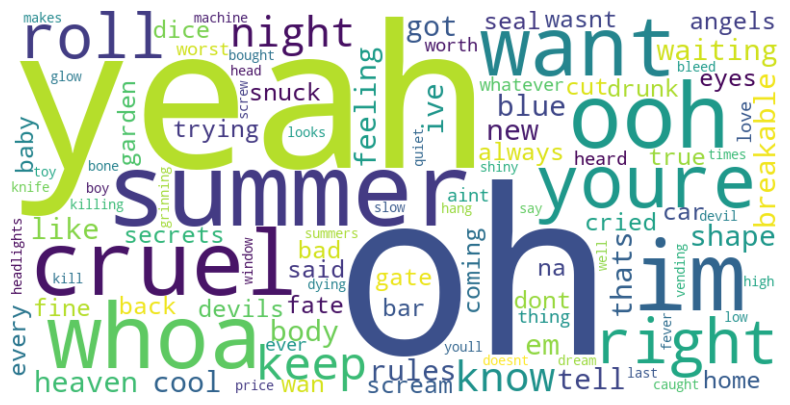

In [20]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

In [21]:
# First, ensure that all lyrics are indeed strings
merged_df['lyrics'] = merged_df['lyrics'].astype(str)

# Concatenate all lyrics into one big text pile
all_lyrics_text = ' '.join(merged_df['lyrics'])

all_lyrics_preprocessed = preprocess(all_lyrics_text)

all_lyrics_preprocessed

all_lyrics_preprocessed_nonan = re.sub(' nan', '', all_lyrics_preprocessed)
all_lyrics_preprocessed_nonan = re.sub('nan ', '', all_lyrics_preprocessed)

words = nltk.word_tokenize(all_lyrics_preprocessed_nonan)
words



['todo',
 'está',
 'bien',
 'no',
 'te',
 'tiene',
 'que',
 'estresar',
 'a',
 'ti',
 'yo',
 'sola',
 'no',
 'te',
 'dejaré',
 'me',
 'encuhlé',
 'la',
 'primera',
 've',
 'que',
 'la',
 'vi',
 'me',
 'enamoré',
 'cuando',
 'con',
 'ella',
 'bailé',
 'desde',
 'hace',
 'rato',
 'se',
 'quería',
 'pegar',
 'puse',
 'la',
 'espalda',
 'contra',
 'la',
 'pared',
 'y',
 'si',
 'yo',
 'bajo',
 'sabe',
 'qué',
 'le',
 'haré',
 'tú',
 'quiere',
 'mami',
 'se',
 'le',
 'viran',
 'los',
 'ojo',
 'la',
 'miro',
 'y',
 'se',
 'relame',
 'el',
 'pintalabio',
 'rojo',
 'esa',
 'cintura',
 'suelta',
 'baby',
 'si',
 'yo',
 'te',
 'cojo',
 'te',
 'subo',
 'a',
 'la',
 'altura',
 'tú',
 'dime',
 'y',
 'te',
 'recojo',
 'ella',
 'a',
 'manejar',
 'me',
 'dejó',
 'siempre',
 'se',
 'va',
 'a',
 'sentir',
 'cuando',
 'a',
 'un',
 'lugar',
 'llegue',
 'yo',
 'yo',
 'estaba',
 'coronando',
 'desde',
 'que',
 'era',
 'menor',
 'por',
 'fotos',
 'se',
 've',
 'bien',
 'pero',
 'de',
 'frente',
 'mejor',
 'se

In [22]:
no_stop_words = del_stop_words(words)

no_stop_words

['bien',
 'estresar',
 'sola',
 'dejaré',
 'encuhlé',
 'primera',
 'vi',
 'enamoré',
 'bailé',
 'hace',
 'rato',
 'quería',
 'pegar',
 'puse',
 'espalda',
 'pared',
 'si',
 'bajo',
 'sabe',
 'haré',
 'quiere',
 'mami',
 'viran',
 'ojo',
 'miro',
 'relame',
 'pintalabio',
 'rojo',
 'cintura',
 'suelta',
 'baby',
 'si',
 'cojo',
 'subo',
 'altura',
 'dime',
 'recojo',
 'manejar',
 'dejó',
 'siempre',
 'va',
 'sentir',
 'lugar',
 'llegue',
 'coronando',
 'menor',
 'fotos',
 'bien',
 'frente',
 'mejor',
 'dio',
 'par',
 'copas',
 'vino',
 'tinto',
 'pidió',
 'pausa',
 'iba',
 'quinto',
 'di',
 'vuelta',
 'barrio',
 'kymco',
 'ello',
 'ven',
 'frente',
 'quedan',
 'trinco',
 'sola',
 'hace',
 'sola',
 'paga',
 'prende',
 'apaga',
 'llamando',
 'atención',
 'quiere',
 'haga',
 'quiere',
 'mami',
 'viran',
 'ojo',
 'miro',
 'relame',
 'pintalabio',
 'rojo',
 'cintura',
 'suelta',
 'baby',
 'si',
 'cojo',
 'subo',
 'altura',
 'dime',
 'recojo',
 'pa',
 'inevitable',
 'bebé',
 'gana',
 'notable

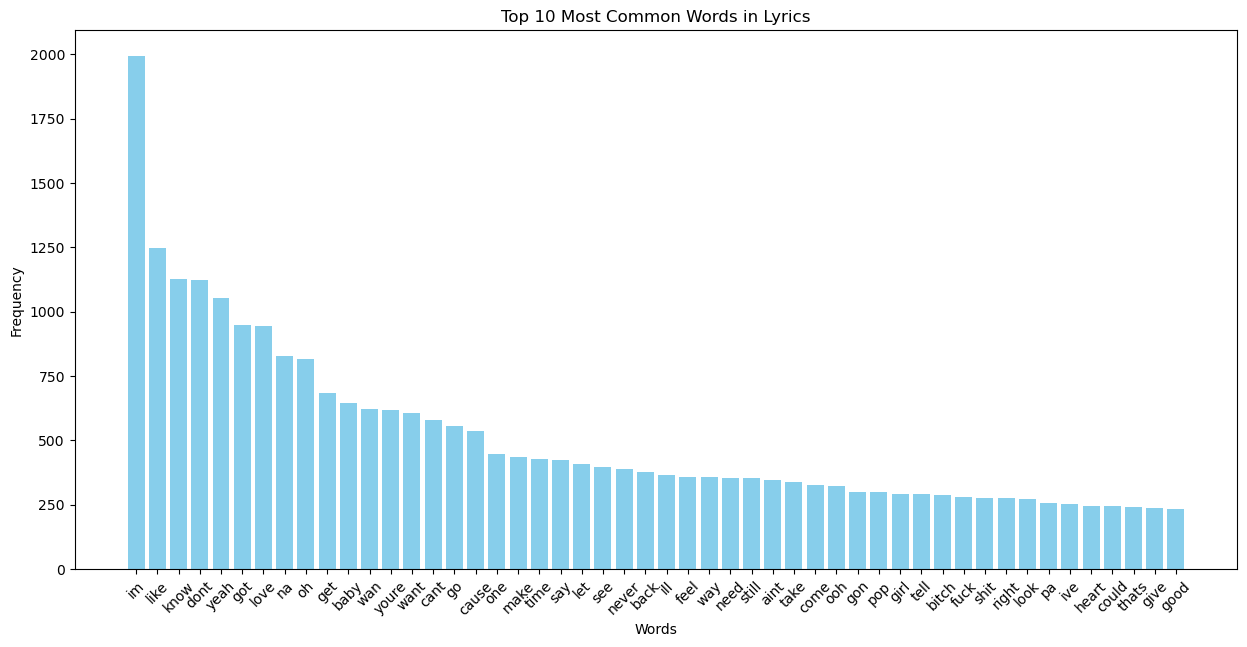

In [23]:
freq = Counter(no_stop_words)

top_n = 50
most_common_words = freq.most_common(top_n)

# Unpack the words and their frequencies for plotting
words, frequencies = zip(*most_common_words)

# Create bar graph
plt.figure(figsize=(15, 7))  # Set the size of the figure
plt.bar(words, frequencies, color='skyblue')  # Create the bar chart
plt.title('Top 10 Most Common Words in Lyrics')  # Title of the graph
plt.xlabel('Words')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()  # Display the graph

In [49]:
new_preprocessed_lyrics_col = []

def sentiment_preprocess(col):
    
    for song in merged_df.lyrics:
    
        lyric = preprocess(song)

        words = nltk.word_tokenize(lyric)
        words

        cleaned_col = ' '.join(words)
        
        new_preprocessed_lyrics_col.append(cleaned_col)
    
    return new_preprocessed_lyrics_col

new_lyrics_col = sentiment_preprocess(merged_df.lyrics)


new_df = merged_df.copy()

new_df['lyrics'] = new_lyrics_col

new_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,lyrics
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,nan
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,todo está bien no te tiene que estresar a ti y...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,hate to give the satisfaction asking how youre...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,yeah yeah yeah yeah fever dream high in the qu...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,baby dime la verdad si te olvidaste de mí yo s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,wan na hear a part to my story i tried to hide...
964,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,no words appear before me in the aftermath sal...
965,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6,nan
966,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,una noche que no puedo olvidar y aunque tenga ...


In [50]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vanessa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [51]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Define a function to get the compound sentiment score
def get_vader_sentiment(lyrics):
    return sia.polarity_scores(lyrics)['compound']

# Apply the function to the 'lyrics' column to create a new 'sentiment' column
new_df['sentiment'] = new_df['lyrics'].apply(get_vader_sentiment)

new_df


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,lyrics,sentiment
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,nan,0.0000
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,todo está bien no te tiene que estresar a ti y...,-0.6808
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,hate to give the satisfaction asking how youre...,-0.8692
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,yeah yeah yeah yeah fever dream high in the qu...,-0.3867
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,baby dime la verdad si te olvidaste de mí yo s...,-0.9595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,wan na hear a part to my story i tried to hide...,0.6113
964,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,no words appear before me in the aftermath sal...,-0.9182
965,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6,nan,0.0000
966,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,una noche que no puedo olvidar y aunque tenga ...,-0.9816


In [52]:
# This will create a list of values from 'column_name' that are not NaN
non_nan_df = pd.DataFrame([row for index, row in new_df.iterrows() if row['lyrics'] != 'nan'])

print(len(non_nan_df))
non_nan_df

458


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,lyrics,sentiment
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,todo está bien no te tiene que estresar a ti y...,-0.6808
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,hate to give the satisfaction asking how youre...,-0.8692
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,yeah yeah yeah yeah fever dream high in the qu...,-0.3867
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,baby dime la verdad si te olvidaste de mí yo s...,-0.9595
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24,the mandem too inconsiderate five star hotels ...,-0.1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,The Great War,Taylor Swift,1,2022,10,21,1274,0,181382590,1,6,11,0,0,96,F,Major,57,55,74,22,0,8,4,my knuckles were bruised like violets sucker p...,0.9595
963,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,wan na hear a part to my story i tried to hide...,0.6113
964,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,no words appear before me in the aftermath sal...,-0.9182
966,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,una noche que no puedo olvidar y aunque tenga ...,-0.9816


In [53]:
# Define the bins for sentiment scores
bins = [-1, -0.05, 0.05, 1]  # Adjust the thresholds as needed
labels = ['negative', 'neutral', 'positive']
non_nan_df['sentiment_category'] = pd.cut(non_nan_df['sentiment'], bins=bins, labels=labels, include_lowest=True)

# Check the distribution of the new categorical sentiment
print(non_nan_df['sentiment_category'].value_counts())

# Now, use 'sentiment_category' as the target variable for classification
X = non_nan_df['lyrics']
y = non_nan_df['sentiment_category']

# Ensure there are no NaN values in 'y'
y = y.dropna()

non_nan_df['sentiment_category']


sentiment_category
positive    233
negative    213
neutral      12
Name: count, dtype: int64


1      negative
2      negative
3      negative
4      negative
5      negative
         ...   
962    positive
963    positive
964    negative
966    negative
967    negative
Name: sentiment_category, Length: 458, dtype: category
Categories (3, object): ['negative' < 'neutral' < 'positive']

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    non_nan_df['lyrics'], 
    non_nan_df['sentiment_category'], 
    test_size=0.2, 
    random_state=42
)

# Create a pipeline with TF-IDF Vectorizer and a classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the predictions
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Use the trained pipeline to predict sentiment categories for new lyrics
new_lyrics = ["hello world"]
new_sentiment = pipeline.predict(new_lyrics)
print(f"Predicted Sentiment: {new_sentiment[0]}")


              precision    recall  f1-score   support

    negative       0.74      0.67      0.71        43
     neutral       0.50      0.33      0.40         3
    positive       0.75      0.83      0.78        46

    accuracy                           0.74        92
   macro avg       0.66      0.61      0.63        92
weighted avg       0.74      0.74      0.74        92

[[29  1 13]
 [ 2  1  0]
 [ 8  0 38]]
Predicted Sentiment: neutral


In [55]:
non_nan_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,lyrics,sentiment,sentiment_category
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,todo está bien no te tiene que estresar a ti y...,-0.6808,negative
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,hate to give the satisfaction asking how youre...,-0.8692,negative
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,yeah yeah yeah yeah fever dream high in the qu...,-0.3867,negative
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,baby dime la verdad si te olvidaste de mí yo s...,-0.9595,negative
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24,the mandem too inconsiderate five star hotels ...,-0.1975,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,The Great War,Taylor Swift,1,2022,10,21,1274,0,181382590,1,6,11,0,0,96,F,Major,57,55,74,22,0,8,4,my knuckles were bruised like violets sucker p...,0.9595,positive
963,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,wan na hear a part to my story i tried to hide...,0.6113,positive
964,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,no words appear before me in the aftermath sal...,-0.9182,negative
966,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,una noche que no puedo olvidar y aunque tenga ...,-0.9816,negative


In [78]:
import pandas as pd

non_nan_df.to_csv('music_df.csv', index=False)

In [93]:
music_df = pd.read_csv('./music_df.csv')

In [94]:
# Manually creating the release_date column
music_df['release_date'] = pd.to_datetime(music_df['released_year'].astype(str) + '-' + 
                                          music_df['released_month'].astype(str).str.zfill(2) + '-' + 
                                          music_df['released_day'].astype(str).str.zfill(2))

# Setting the release_date as the index of the dataframe
music_df.set_index('release_date', inplace=True)

# Displaying the first few rows of the updated dataframe to verify the changes
music_df.head()


# Dropping the original year, month, and day columns
music_df.drop(['released_year', 'released_month', 'released_day'], axis=1, inplace=True)

# Displaying the first few rows of the updated dataframe to verify the changes
music_df.head()


,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,lyrics,sentiment,sentiment_category
release_date,,,,,,,,,,,,,,,,,,,,,,,,
2023-03-23,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,todo está bien no te tiene que estresar a ti y...,-0.6808,negative
2023-06-30,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,hate to give the satisfaction asking how youre...,-0.8692,negative
2019-08-23,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,yeah yeah yeah yeah fever dream high in the qu...,-0.3867,negative
2023-05-18,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,baby dime la verdad si te olvidaste de mí yo s...,-0.9595,negative
2023-06-01,Sprinter,"Dave, Central Cee",2,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24,the mandem too inconsiderate five star hotels ...,-0.1975,negative


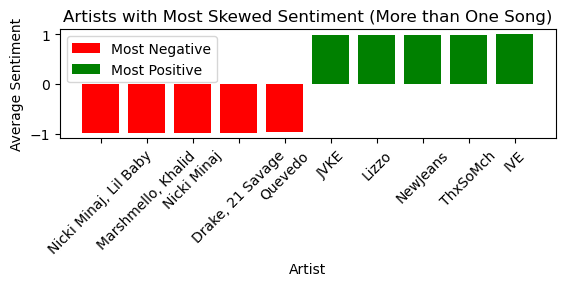

In [114]:
# Analysis: Artists with Most Skewed Sentiments with More Than One Song
artist_counts = music_df_above_2010.groupby('artist(s)_name').size()
artists_multiple_songs = artist_counts[artist_counts > 1].index
artist_sentiment_multiple = music_df_above_2010[music_df_above_2010['artist(s)_name'].isin(artists_multiple_songs)]
artist_sentiment_multiple = artist_sentiment_multiple.groupby('artist(s)_name')['sentiment'].mean().sort_values()

# Plot for Artists with Most Skewed Sentiments
plt.subplot(3, 1, 2)
plt.bar(artist_sentiment_multiple.head(5).index, artist_sentiment_multiple.head(5), color='red', label='Most Negative')
plt.bar(artist_sentiment_multiple.tail(5).index, artist_sentiment_multiple.tail(5), color='green', label='Most Positive')
plt.xlabel('Artist')
plt.ylabel('Average Sentiment')
plt.title('Artists with Most Skewed Sentiment (More than One Song)')
plt.xticks(rotation=45)
plt.legend()


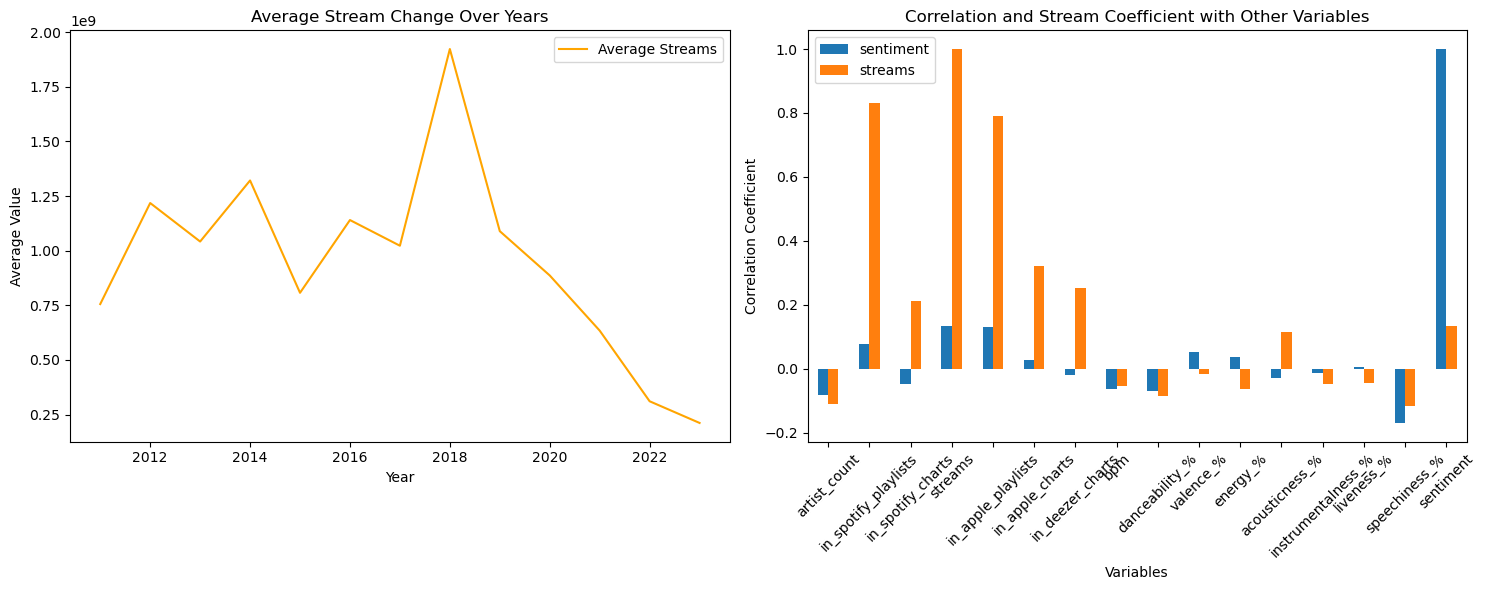

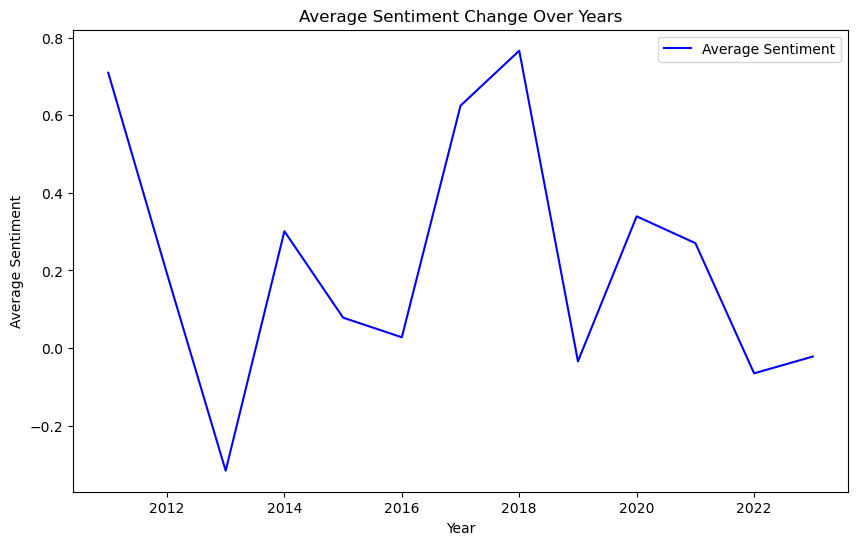

In [117]:
# Adding a 'year' column for grouping
music_df_above_2010['year'] = music_df_above_2010.index.year

# Calculating the yearly average of sentiment and streams
sentiment_stream_yearly_alternative = music_df_above_2010.groupby('year')[['sentiment', 'streams']].mean()

# Selecting only numeric columns for correlation analysis
numeric_columns = music_df_above_2010.select_dtypes(include=['int64', 'float64']).columns

correlations_alternative = music_df_above_2010[numeric_columns].corr()[['sentiment', 'streams']]

# Average Sentiment and Stream Change Over the Years
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(sentiment_stream_yearly_alternative.index, sentiment_stream_yearly_alternative['streams'], label='Average Streams', color='orange')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Stream Change Over Years')
plt.legend()

# Correlation and Stream Coefficient with Other Variables
plt.subplot(1, 2, 2)
correlations_alternative.plot(kind='bar', ax=plt.gca())
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation and Stream Coefficient with Other Variables')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculating the average sentiment for each year
average_sentiment_yearly = music_df_above_2010.groupby('year')['sentiment'].mean()

# Plotting the average sentiment change over the years
plt.figure(figsize=(10, 6))
plt.plot(average_sentiment_yearly.index, average_sentiment_yearly, label='Average Sentiment', color='blue')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Change Over Years')
plt.legend()
plt.show()



# Analysis and Findings
---

### Average Sentiment Change Over Years

The graph depicting the average sentiment change over the years reveals a dynamic landscape in the emotional tone of music. This fluctuation in sentiment underscores the evolving nature of music, reflecting shifts in cultural moods, trends, and possibly the influence of global events.

Years with notably high average sentiment might coincide with periods of cultural optimism or popular music trends favoring uplifting themes. Conversely, years with lower average sentiment could align with more somber or reflective cultural periods. This trend analysis is crucial in understanding how external factors and artistic expressions interplay in shaping the music of any given era.

---

### Artists with Most Skewed Sentiment (More than One Song)

The bar chart identifying artists with the most skewed sentiments provides a window into the diverse emotional landscapes crafted by different artists. Some artists consistently produce music with a predominantly positive sentiment, while others lean towards more negative emotional expressions.

The variation in sentiment across artists could be indicative of their unique artistic styles, preferred themes, or target audience. Artists with highly positive sentiments might be catering to audiences seeking uplifting or comforting music, while those with negative sentiments could be addressing more complex, challenging themes. This analysis can help in profiling artists and understanding their positions in the musical landscape.

---

### Correlation and Stream Coefficient with Other Variables

The correlation analysis between sentiment, streams, and other musical variables reveals insightful patterns about what drives a song's popularity and how its emotional content resonates with listeners.

Strong correlations between streams and specific musical characteristics could suggest that certain elements are more influential in a song's success. For instance, a positive correlation between sentiment and streams might indicate that songs with a particular emotional tone are more popular. This analysis is invaluable for artists and record labels in strategizing song production and marketing.



# Conclusion
The integration of lyrical content into the dataset offered a richer perspective on music analysis, bridging the gap between textual and quantitative data. The findings demonstrate the importance of lyrics in understanding a song's sentiment and its potential impact on streaming success. This comprehensive approach to music analysis could be instrumental for artists, producers, and industry professionals in crafting songs that resonate with audiences.